In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import plot_pred_v_truth

## Combine all dfs into single dataset

In [2]:
# Read all dataframes into numpy arrays
df05 = pd.read_csv("pulse_data/pulse_response_T0.csv", header=None).to_numpy()
df1 = pd.read_csv("pulse_data/pulse_response_T1(in).csv", header=None).to_numpy()
df5 = pd.read_csv("pulse_data/pulse_response_T5(in).csv", header=None).to_numpy()
df10 = pd.read_csv("pulse_data/pulse_response_T10(in).csv", header=None).to_numpy()
df50 = pd.read_csv("pulse_data/pulse_response_T50(in).csv", header=None).to_numpy()
df100 = pd.read_csv("pulse_data/pulse_response_T100(in).csv", header=None).to_numpy()

# Combine into a list
dfs = [df05, df1, df5, df10, df50, df100]
signal_names = ['T0.5', 'T1','T5', 'T10', 'T50', 'T100']

# Extract time, input, output for each dataframe
time = np.array([df[:, 0] for df in dfs])
input_signal = np.array([df[:, 1] for df in dfs])
output_signal = np.array([df[:, 2] for df in dfs])

# Save each as a CSV file (rows: signals, columns: time series values)
np.savetxt("pulse_data/time.csv", time, delimiter=",")
np.savetxt("pulse_data/input_signal.csv", input_signal, delimiter=",")
np.savetxt("pulse_data/output_signal.csv", output_signal, delimiter=",")

In [3]:
time.shape, input_signal.shape, output_signal.shape

((6, 2001), (6, 2001), (6, 2001))

In [9]:
time[-1]

200.0

## Generate Heaviside examples

In [4]:
df = pd.read_csv("pulse_data/pulse_response_T5(in).csv",header = None).to_numpy()

time = df[:, 0]
input_signal = df[:, 1]
output_signal = df[:, 2]

N = time.shape[0]

g_hat = np.fft.fft(output_signal)
f_hat = np.fft.fft(input_signal)
H_hat = g_hat / f_hat
H = np.fft.ifft(H_hat)

In [6]:
samples = 1500

N = time.shape[0]
input_signals = np.zeros((samples, len(time)))

start_impulse = np.random.randint(20, N-200, size = samples)
for i in range(samples):
    max_time_for_impulse = N - start_impulse[i] - 50
    length_impulse = np.random.randint(5, max_time_for_impulse)
    input_signals[i, start_impulse[i]:length_impulse + start_impulse[i]] = 1

output_signals = np.zeros_like(input_signals)

input_hat = np.fft.fft(input_signals, axis=1)

for i,sig in enumerate(input_signals):
    u_hat = H_hat * input_hat[i]
    u = np.fft.ifft(u_hat) 
    output_signals[i] = u

C:\Users\mathi\AppData\Local\Temp\ipykernel_26500\2534073479.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  output_signals[i] = u


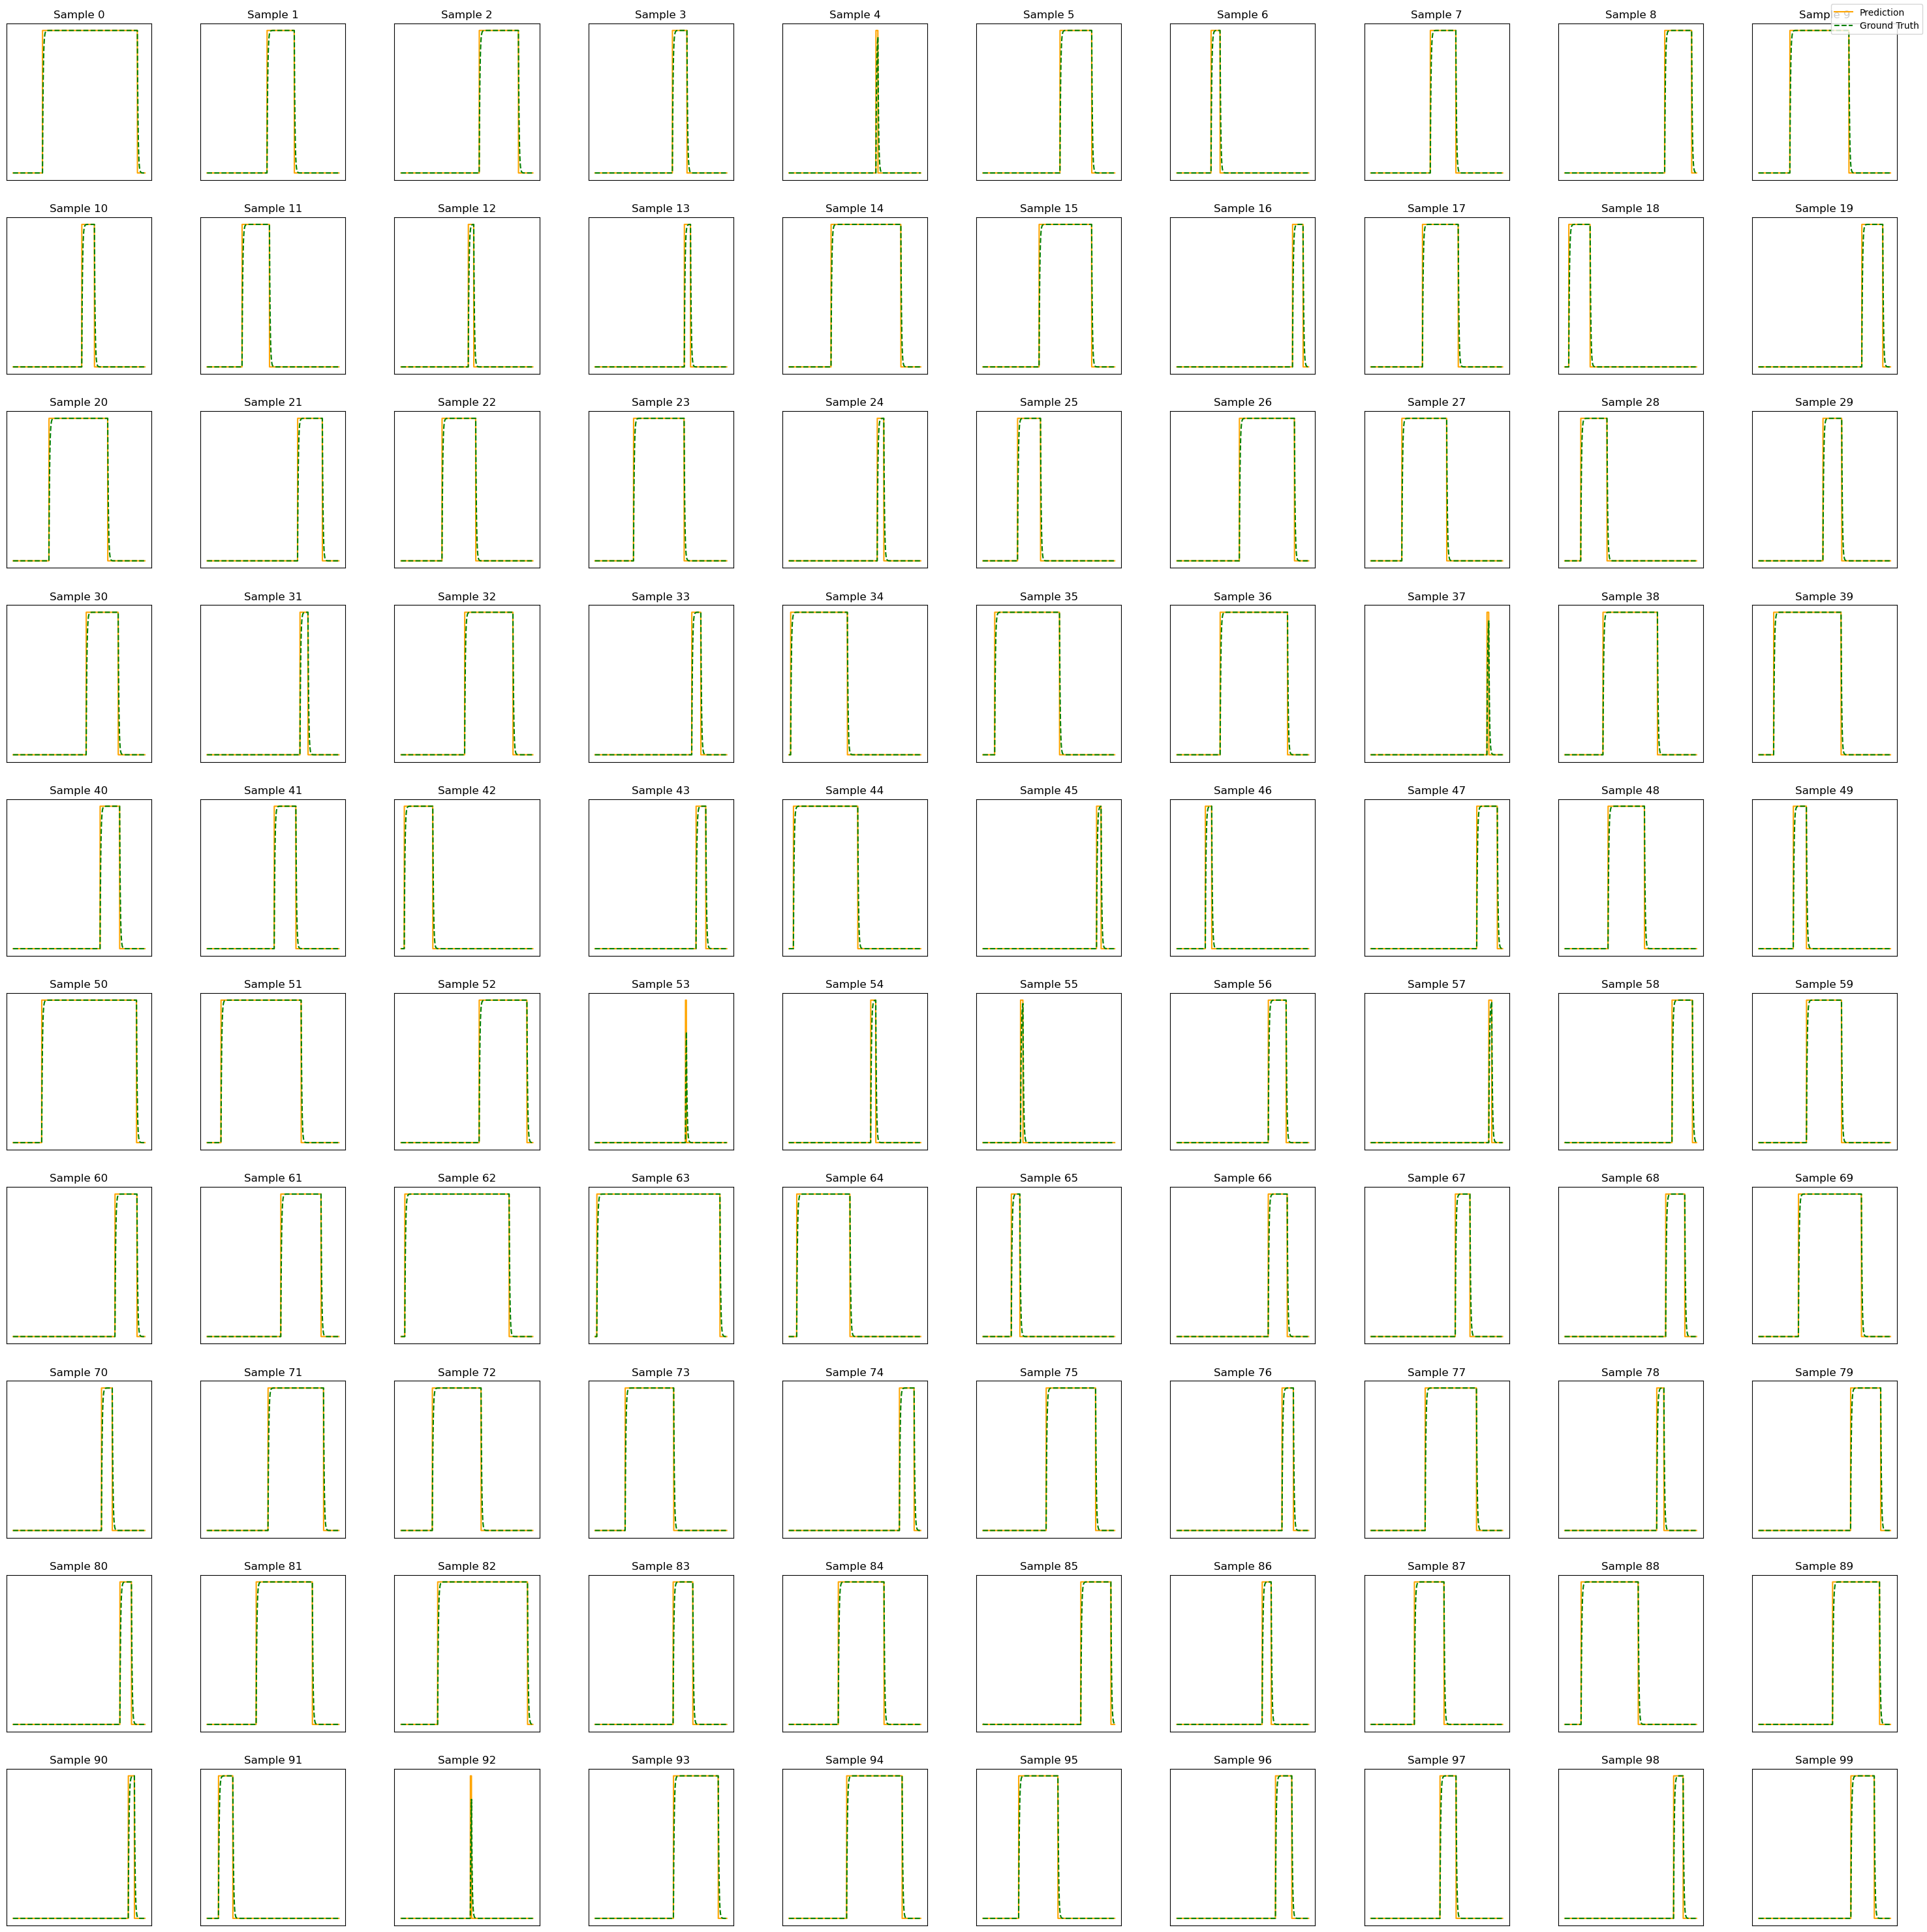

In [7]:
plot_pred_v_truth(time, input_signals[:, np.newaxis, :], output_signals[:, np.newaxis, :])

In [8]:
# train_x, train_y = input_signals[:1000], output_signals[:1000]
# test_x, test_y = input_signals[1000:], output_signals[1000:]

# pd.DataFrame(train_x).to_csv("pulse_data/train_x.csv", index=False)
# pd.DataFrame(train_y).to_csv("pulse_data/train_y.csv", index=False)
# pd.DataFrame(test_x).to_csv("pulse_data/test_x.csv", index=False)
# pd.DataFrame(test_y).to_csv("pulse_data/test_y.csv", index=False)


## Generate other functions

In [25]:
samples = 100
num_of_coeffs = 3

phase = np.random.uniform(0 , 2 * np.pi, (samples, num_of_coeffs))
freqs = np.random.uniform(0 , 0.1, (samples, num_of_coeffs))
multipliers = np.random.uniform(-2 , 2, (samples, num_of_coeffs))

input_signals = np.zeros((samples, len(time)))

for j in range(samples):
    for i in range(num_of_coeffs):
        input_signals[j] += multipliers[j, i] * np.sin(2 * np.pi * freqs[j, i] * time + phase[j, i])

output_signals = np.zeros_like(input_signals)

for i,sig in enumerate(input_signals):
    u = np.fft.ifft(H_hat * np.fft.fft(sig))
    output_signals[i] = u

C:\Users\mathi\AppData\Local\Temp\ipykernel_26500\2092326347.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  output_signals[i] = u


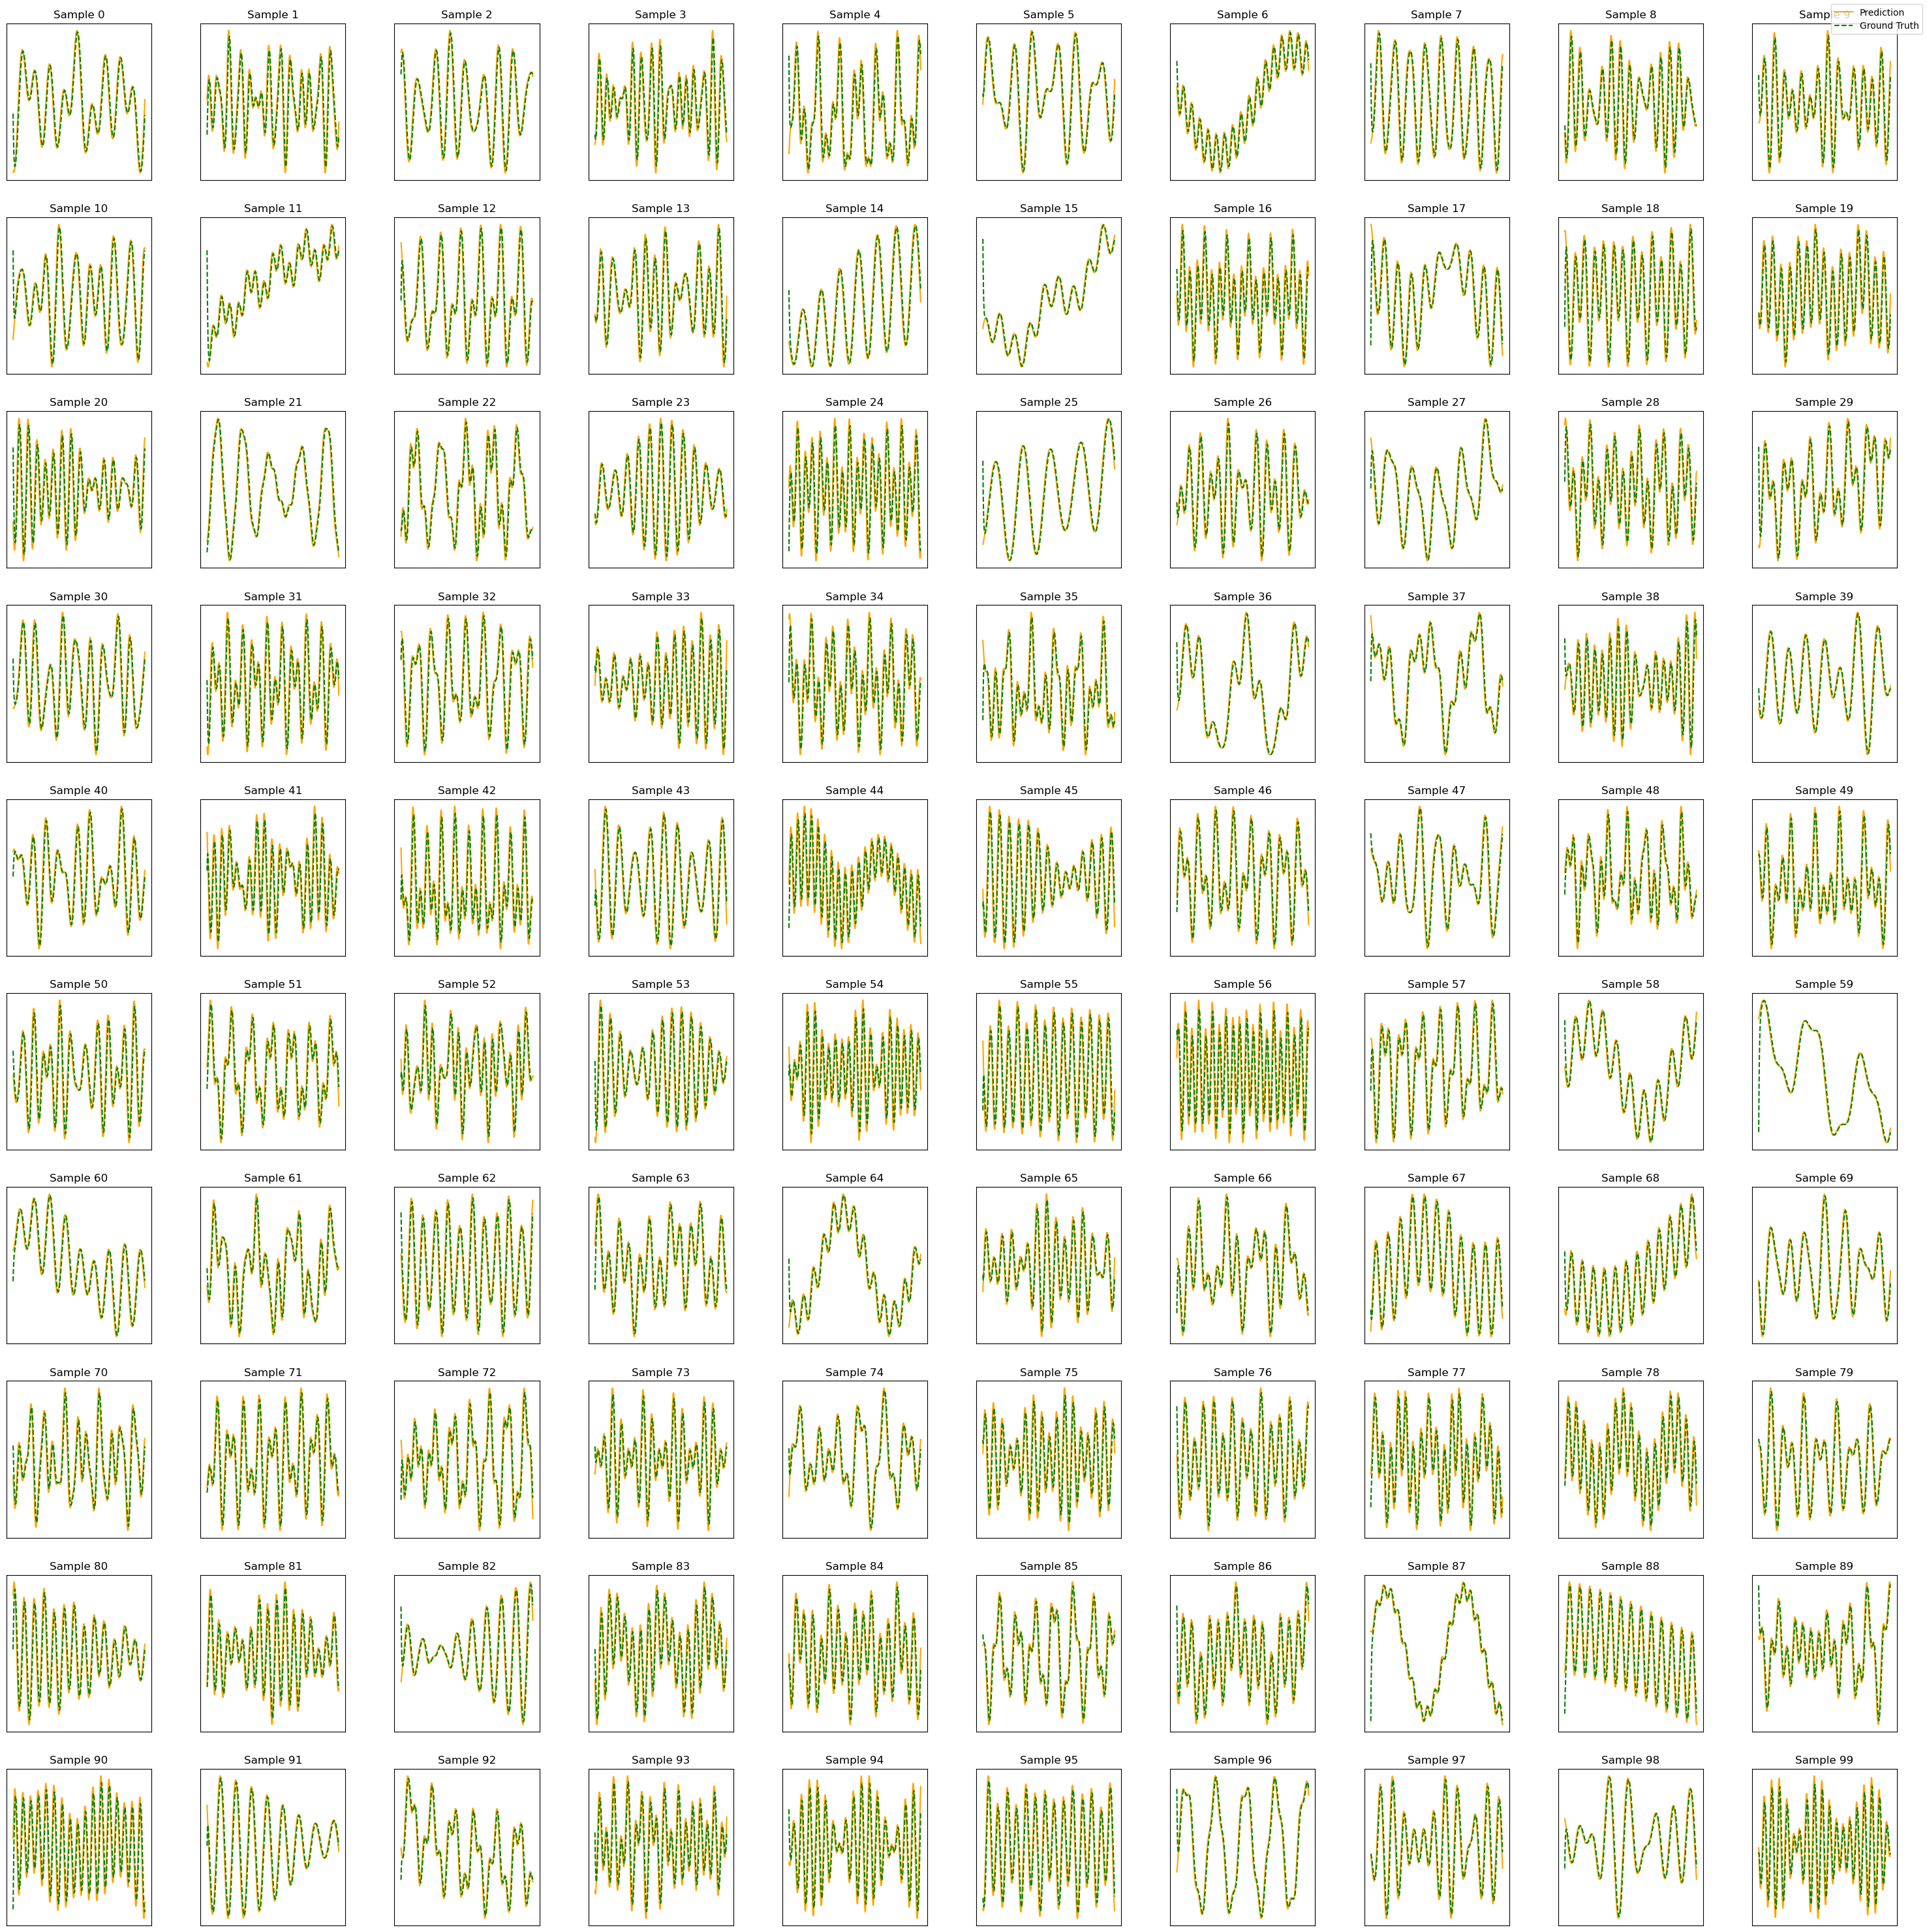

In [26]:
plot_pred_v_truth(time, input_signals[:, np.newaxis, :], output_signals[:, np.newaxis, :])

In [28]:
pd.DataFrame(input_signals).to_csv("pulse_data/outOfDist_x.csv", index=False)
pd.DataFrame(output_signals).to_csv("pulse_data/outOfDist_y.csv", index=False)